# What is the global glacier ice volume outside the ice sheets?

Code & data attached to the manuscript. If using the data for something else, please refer to the original sources.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

## Read in the various estimates

In [2]:
# Match regional agg choices Millan 2022
def reformat_df(df):
    df.loc['01, 02'] = df.loc[['01', '02']].sum()
    df.loc['13, 14, 15'] = df.loc[['13', '14', '15']].sum()
    return df.drop(['01', '02'] + ['13', '14', '15']).sort_index()

In [3]:
# Output
gdf = pd.DataFrame()

s = 'bm96'
gdf.loc['Global', f'{s}_V'] = 180000
gdf.loc['Global', f'{s}_V_err'] = 40000
gdf.loc['Global', f'{s}_SLE'] = 0.5
gdf.loc['Global', f'{s}_SLE_err'] = 0.1

s = 'o04'
gdf.loc['excl. A. & G.', f'{s}_V'] = 56000
gdf.loc['excl. A. & G.', f'{s}_V_err'] = np.NaN
gdf.loc['excl. A. & G.', f'{s}_SLE'] = 0.15
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = np.NaN

s = 'dm05'
gdf.loc['Global', f'{s}_V'] = 260000
gdf.loc['Global', f'{s}_V_err'] = 65000
gdf.loc['Global', f'{s}_SLE'] = 0.65
gdf.loc['Global', f'{s}_SLE_err'] = 0.16
gdf.loc['excl. A. & G.', f'{s}_V'] = 133000
gdf.loc['excl. A. & G.', f'{s}_V_err'] = 20000
gdf.loc['excl. A. & G.', f'{s}_SLE'] = 133000 * 0.9 / 326
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = 20000 * 0.9 / 326

s = 'rb05'
gdf.loc['excl. A. & G.', f'{s}_V'] = 87000
gdf.loc['excl. A. & G.', f'{s}_V_err'] = 10000
gdf.loc['excl. A. & G.', f'{s}_SLE'] = 0.241
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = 0.026

The following estimates have regional tables.

### Radic & Hock 2010

This is pre-RGI and slightly different:

In [4]:
rh10 = pd.read_csv('data/rh10.csv', index_col=0, header=1)
rh10

,WGI_XF,A,A_err,V,V_err,A.1,A_err.1,V.1,V_err.1,SLE,SLE_err
1.0,Svalbard,36506,364,10260,823,36506,364,10260,823,26.00,2.00
2.0,Scandinavia,3057,18,224,11,3057,18,224,11,0.56,0.03
3.0,Central Europe,3045,17,194,12,3045,17,194,12,0.48,0.03
4.0,Franz Josef Land,13739,141,2248,176,13739,141,2248,176,5.60,0.40
5.0,Novaya Zemlya,23645,1132,9410,3388,23645,1132,9410,3388,23.00,8.00
6.0,Severnaya Zemlya,19397,566,6046,1231,19397,566,6046,1231,15.00,3.00
7.0,Caucasus,1397,10,88,6,1397,10,88,6,0.22,0.01
8.0,North and Eat Asia,2902,14,170,8,2902,14,170,8,0.42,0.02
9.0,High Mountain Ais,107340,229,10877,404,114330,729,12483,462,31.00,1.00
10.0,Alaska,27818,518,10477,1816,79260,1079,27436,3312,68.00,8.00


In [5]:
rh10_total = rh10.iloc[-1:].copy()
rh10_total

,WGI_XF,A,A_err,V,V_err,A.1,A_err.1,V.1,V_err.1,SLE,SLE_err
NaN,Total,317724,1708,69481,4784,741448,68186,241430,29229,600.0,73.0


In [6]:
rh10 = rh10.iloc[:-1].copy().drop('WGI_XF', axis=1)
rh10.index = [f'{int(c):02d}' for c in rh10.index]
rh10.sum().to_frame().T

,A,A_err,V,V_err,A.1,A_err.1,V.1,V_err.1,SLE,SLE_err
0,317725.0,4614.0,69482.0,11514.0,741449.0,79721.0,241429.0,53811.0,598.95,132.61


In [7]:
((rh10**2).sum()**0.5).loc[['A_err.1', 'V_err.1', 'SLE_err']].to_frame().T

,A_err.1,V_err.1,SLE_err
0,68185.6067,29228.473806,72.30485


Table is consistent.

**Volume without 05 and 19**:

In [8]:
rh10_no = rh10.drop(['17', '18', '19'])
rh10_no_s = rh10_no.sum().to_frame().T
rh10_no_s

,A,A_err,V,V_err,A.1,A_err.1,V.1,V_err.1,SLE,SLE_err
0,298426.0,4408.0,66855.0,11287.0,514309.0,7192.0,164043.0,24945.0,407.05,61.51


In [9]:
err = ((rh10_no**2).sum()**0.5).loc[['A_err.1', 'V_err.1', 'SLE_err']].to_frame().T
err

,A_err.1,V_err.1,SLE_err
0,2429.05743,13349.39905,32.908681


In [10]:
rh10_no['V.1'].values

array([10260,   224,   194,  2248,  9410,  6046,    88,   170, 12483,
       27436,  1892, 80160,  4889,   344,  8116,    83])

In [11]:
s = 'rh10'
gdf.loc['Global', f'{s}_V'] = rh10_total['V.1'].values
gdf.loc['Global', f'{s}_V_err'] = rh10_total['V_err.1'].values
gdf.loc['Global', f'{s}_SLE'] = rh10_total['SLE'].values
gdf.loc['Global', f'{s}_SLE_err'] = rh10_total['SLE_err'].values
gdf.loc['excl. A. & G.', f'{s}_V'] = rh10_no_s['V.1'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = err['V_err.1'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = rh10_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = err['SLE_err'].values * 1e-3

### Marzeion et al, 2012

In [12]:
m12 = pd.read_csv('data/m12.csv', index_col=0)

In [13]:
m12[['A', 'A_err']] = m12[['A', 'A_err']] * 1e3

Let's compute the volumes from SLE:

In [14]:
m12['V'] = m12['SLE'] * 362 / 0.9
m12['V_err'] = m12['SLE_err'] * 362 / 0.9

In [15]:
m12_total = m12.iloc[-1:].copy()
m12_total

,A,A_err,V,V_err,SLE,SLE_err
RGI_Reg,,,,,,
Total (without 19),590900.0,1600.0,148983.111111,7521.555556,370.4,18.7


In [16]:
m12 = m12.iloc[:-1].copy()
m12.index = [f'{int(c):02d}' for c in m12.index]
m12.sum().to_frame().T

,A,A_err,V,V_err,SLE,SLE_err
0,590800.0,3800.0,148942.888889,17617.333333,370.3,43.8


In [17]:
((m12**2).sum()**0.5).loc[['A_err', 'V_err', 'SLE_err']].to_frame().T

,A_err,V_err,SLE_err
0,1593.737745,7736.898923,19.235384


OK Table is more or less consistent, **uncertainty estimates computed as uncorrelated.**

**Volume without 05 and 19**:

In [18]:
m12_no5 = m12.drop('05')
m12_no5_s = m12_no5.sum().to_frame().T
m12_no5_s

,A,A_err,V,V_err,SLE,SLE_err
0,504700.0,3700.0,137841.555556,15847.555556,342.7,39.4


In [19]:
err = ((m12_no5**2).sum()**0.5).loc[['A_err', 'V_err', 'SLE_err']].to_frame().T
err

,A_err,V_err,SLE_err
0,1590.597372,7531.765501,18.725384


In [20]:
s = 'm12'
gdf.loc['excl. A. & G.', f'{s}_V'] = m12_no5_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = err['V_err'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = m12_no5_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = err['SLE_err'].values * 1e-3

### Huss & Farinotti 2012

In [174]:
hf12 = pd.read_csv('data/hf12.csv', index_col=0).drop('Name', axis=1)

In [175]:
hf12

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
1,89901,20402,1501,50.7,3.7
2,14615,1025,84,2.5,0.2
3,105139,34399,4699,85.4,11.7
4,40893,9814,1115,24.4,2.8
5,87765,19042,2655,47.3,6.6
6,11055,4441,370,11.0,0.9
7,33932,9685,922,24.0,2.3
8,2846,256,19,0.6,0.0
9,51665,16839,2205,41.8,5.5


In [22]:
hf12_total = hf12.iloc[[-1]].copy()
hf12_total

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
Total,734856,170214,20688,422.6,57.1


In [23]:
hf12 = hf12.iloc[:-1].copy()
hf12.index = [f'{int(c):02d}' for c in hf12.index]
hf12.sum().to_frame().T

,A,V,V_err,SLE,SLE_err
0,734844.0,170205.0,23440.0,422.6,58.1


OK Table is more or less consistent.

**Volume without 05 and 19**:

In [24]:
hf12_no = hf12.drop(['05', '19'])
hf12_no_s = hf12_no.sum().to_frame().T
hf12_no_s

,A,V,V_err,SLE,SLE_err
0,513906.0,113646.0,12383.0,282.2,30.6


In [25]:
s = 'hf12'
gdf.loc['Global', f'{s}_V'] = hf12_total['V'].values
gdf.loc['Global', f'{s}_V_err'] = hf12_total['V_err'].values
gdf.loc['Global', f'{s}_SLE'] = hf12_total['SLE'].values
gdf.loc['Global', f'{s}_SLE_err'] = hf12_total['SLE_err'].values
gdf.loc['excl. A. & G.', f'{s}_V'] = hf12_no_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = hf12_no_s['V_err'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = hf12_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = hf12_no_s['SLE_err'].values * 1e-3

### Grinsted, 2013

In [26]:
g13 = pd.read_csv('data/g13.csv', index_col=0)

Let's compute the volumes from SLE:

In [27]:
g13['V'] = g13['SLE'] * 362 / 0.9
g13['V_err'] = g13['SLE_err'] * 362 / 0.9

In [28]:
g13_total = g13.iloc[-2:].copy()
g13_total

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
Total,734933,140777.777778,28155.555556,350.0,70.0
Withouth 5+19,513881,92511.111111,NaN,230.0,NaN


In [29]:
g13 = g13.iloc[:-2].copy()
g13.index = [f'{int(c):02d}' for c in g13.index]
g13.sum().to_frame().T

,A,V,V_err,SLE,SLE_err
0,734937.0,142145.333333,0.0,353.4,0.0


OK Table is more or less consistent.

**Volume without 05 and 19**:

In [30]:
g13_no = g13.drop(['05', '19'])
g13_no_s = g13_no.sum().to_frame().T
g13_no_s

,A,V,V_err,SLE,SLE_err
0,513881.0,93034.0,0.0,231.3,0.0


In [150]:
s = 'g13'
gdf.loc['Global', f'{s}_V'] = g13_total.loc['Total', 'V']
gdf.loc['Global', f'{s}_V_err'] = g13_total.loc['Total','V_err']
gdf.loc['Global', f'{s}_SLE'] = g13_total.loc['Total','SLE']
gdf.loc['Global', f'{s}_SLE_err'] = g13_total.loc['Total','SLE_err']
gdf.loc['excl. A. & G.', f'{s}_V'] = g13_total.loc['Withouth 5+19','V']
gdf.loc['excl. A. & G.', f'{s}_V_err'] = g13_total.loc['Withouth 5+19','V_err']
gdf.loc['excl. A. & G.', f'{s}_SLE'] = g13_total.loc['Withouth 5+19','SLE']
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = g13_total.loc['Withouth 5+19','SLE_err']

### Radic et al., 2014

In [32]:
r14 = pd.read_csv('data/r14.csv', index_col=0)

In [33]:
r14_total = r14.iloc[[-1]].copy()
r14_total

,A,V,V_err,SLE,SLE_err,V*,SLE*
RGI_Reg,,,,,,,
Total,736989,209973,NaN,522.0,NaN,163277,405.9


In [34]:
r14 = r14.iloc[:-1].copy()
r14.index = [f'{int(c):02d}' for c in r14.index]
r14_s = r14.sum().to_frame().T
r14_s

,A,V,V_err,SLE,SLE_err,V*,SLE*
0,736988.0,209973.0,0.0,522.1,0.0,163276.0,405.9


OK Table is consistent.

**Volume without 05 and 19**:

In [35]:
r14_no = r14.drop(['05', '19'])
r14_no_s = r14_no.sum().to_frame().T
r14_no_s

,A,V,V_err,SLE,SLE_err,V*,SLE*
0,516311.0,144207.0,0.0,358.6,0.0,101052.0,251.2


In [36]:
# s = 'r14'
# gdf.loc['Global', f'{s}_V'] = r14_total['V'].values
# gdf.loc['Global', f'{s}_V_err'] = r14_total['V_err'].values
# gdf.loc['Global', f'{s}_SLE'] = r14_total['SLE'].values
# gdf.loc['Global', f'{s}_SLE_err'] = r14_total['SLE_err'].values
# gdf.loc['excl. A. & G.', f'{s}_V'] = r14_no_s['V'].values
# gdf.loc['excl. A. & G.', f'{s}_V_err'] = np.NaN
# gdf.loc['excl. A. & G.', f'{s}_SLE'] = r14_no_s['SLE'].values * 1e-3
# gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = np.NaN

### Farinotti et al., 2019 

In [53]:
f19 = pd.read_csv('data/f19.csv', index_col=0)
f19[['V', 'V_err']] = f19[['V', 'V_err']] * 1e3

In [54]:
f19_total = f19.iloc[[-1]].copy()
f19_total

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
Total,705253,158170.0,41030.0,324.3,84.1


In [55]:
f19 = f19.iloc[:-1].copy()
f19.sum().to_frame().T

,A,V,V_err,SLE,SLE_err
0,705245.0,158180.0,41050.0,324.2,84.0


OK Table is consistent.

**Volume without 05 and 19**:

In [56]:
f19_no = f19.drop(['05', '19'])
f19_no_s = f19_no.sum().to_frame().T
f19_no_s

,A,V,V_err,SLE,SLE_err
0,482823.0,96020.0,24920.0,221.2,57.3


In [57]:
s = 'f19'
gdf.loc['Global', f'{s}_V'] = f19_total['V'].values
gdf.loc['Global', f'{s}_V_err'] = f19_total['V_err'].values
gdf.loc['Global', f'{s}_SLE'] = f19_total['SLE'].values
gdf.loc['Global', f'{s}_SLE_err'] = f19_total['SLE_err'].values
gdf.loc['excl. A. & G.', f'{s}_V'] = f19_no_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = f19_no_s['V_err'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = f19_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = f19_no_s['SLE_err'].values * 1e-3

### Millan et al., 2022

In [58]:
m22 = pd.read_csv('data/m22.csv', index_col=0)
m22[['A', 'V', 'V_err']] *= 1e3;

In [59]:
m22_total = m22.iloc[[-1]].copy()
m22_total

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
Total,727000.0,140800.0,40400.0,257.2,85.0


In [60]:
m22 = m22.iloc[:-1].copy()
m22_s = m22.sum().to_frame().T
m22_s

,A,V,V_err,SLE,SLE_err
0,726000.0,140900.0,40400.0,311.23,99.4


OK Table is more or less consistent, with the **problem of global SLE of course**.

**Volume without 05 and 19**:

In [61]:
m22_no = m22.drop(['05', '19'])
m22_no_s = m22_no.sum().to_frame().T
m22_no_s

,A,V,V_err,SLE,SLE_err
0,503000.0,94000.0,27600.0,223.13,73.9


In [62]:
s = 'm22'
gdf.loc['Global', f'{s}_V'] = m22_s['V'].values
gdf.loc['Global', f'{s}_V_err'] = m22_s['V_err'].values
gdf.loc['Global', f'{s}_SLE'] = m22_s['SLE'].values
gdf.loc['Global', f'{s}_SLE_err'] = m22_s['SLE_err'].values
gdf.loc['excl. A. & G.', f'{s}_V'] = m22_no_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = m22_no_s['V_err'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = m22_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = m22_no_s['SLE_err'].values * 1e-3

## Plot 

In [152]:
import seaborn as sns

In [153]:
gdf_vol = gdf[[c for c in gdf if 'V' in c]].copy()
estimates = [c.split('_')[0] for c in gdf_vol if 'err' not in c]

In [154]:
for i, e in enumerate(estimates):
    print(e, gdf_vol[[f'{e}_V', f'{e}_V_err']].iloc[0].values * 1e-3)

bm96 [180.  40.]
o04 [nan nan]
dm05 [260.  65.]
rb05 [nan nan]
rh10 [241.43   29.229]
m12 [nan nan]
hf12 [170.214  20.688]
g13 [140.77777778  28.15555556]
f19 [158.17  41.03]
m22 [140.9  40.4]


In [155]:
for i, e in enumerate(estimates):
    print(e, gdf_vol[[f'{e}_V', f'{e}_V_err']].iloc[1].values * 1e-3)

bm96 [nan nan]
o04 [56. nan]
dm05 [133.  20.]
rb05 [87. 10.]
rh10 [164.043       13.34939905]
m12 [137.84155556   7.5317655 ]
hf12 [113.646  12.383]
g13 [92.51111111         nan]
f19 [96.02 24.92]
m22 [94.  27.6]


In [156]:
legend = {
'bm96': 'Meier and Bahr, 1996',
'o04': 'Ohmura, 2004',
'dm05': 'Dyurgerov and Meier, 2005',
'rb05': 'Raper and Braithwaite 2005',
'rh10': 'Radic and Hock, 2010',
'm12': 'Marzeion and others, 2012',
'hf12': 'Huss and Farinotti, 2012',
'g13': 'Grinsted, 2013',
'f19': 'Farinotti and others, 2019',
'm22': 'Millan and others, 2022',
}

In [157]:
sns.set_context('talk')
sns.set_style('whitegrid')

In [164]:
import matplotlib.patches as patches

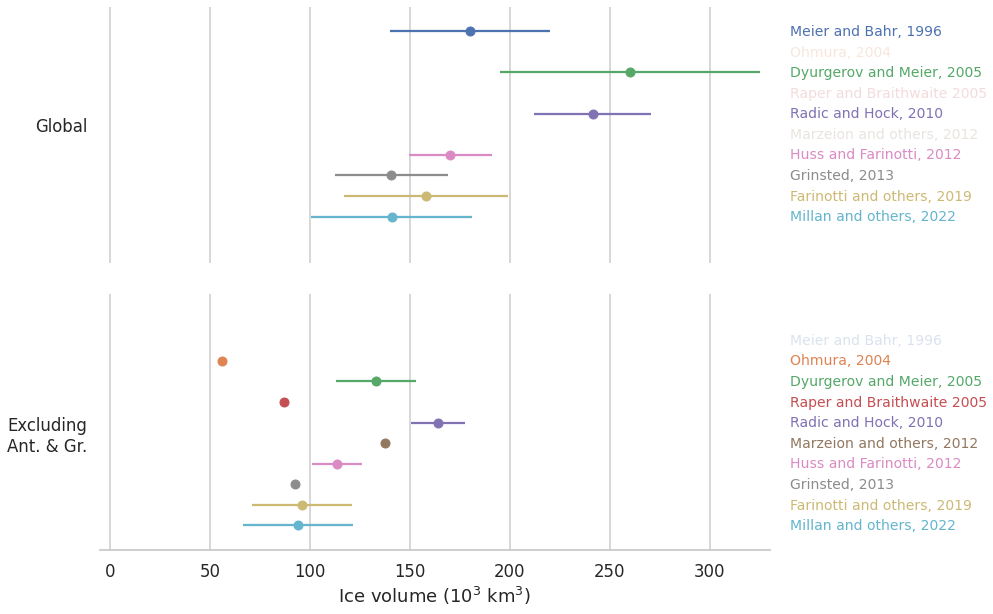

In [173]:
f, ax = plt.subplots(figsize=(12, 10))

x = np.array([1, 2])
offset = np.linspace(-0.3, 0.3, len(estimates))

p = sns.color_palette("deep", as_cmap=True)

xtext = 340

gdf_vol.index = x

for i, e in enumerate(estimates):
    err = gdf_vol[f'{e}_V_err'] * 1e-3
    if not np.isfinite(err.values[0]):
        err=None
    plt.errorbar(gdf_vol[f'{e}_V'] * 1e-3, x+offset[i], xerr=err, fmt='o', c=p[i]);
    
    if np.isfinite(gdf_vol[f'{e}_V'].values[0]):
        alpha = 1
    else:
        alpha = 0.2
        
    plt.text(xtext, x[0]+offset[i], legend[e], c=p[i], va='center', fontsize=14, alpha=alpha)
    
    if np.isfinite(gdf_vol[f'{e}_V'].values[1]):
        alpha = 1
    else:
        alpha = 0.2
    plt.text(xtext, x[1]+offset[i], legend[e], c=p[i], va='center', fontsize=14, alpha=alpha)

ax.set_yticks(x);
ax.set_yticklabels(['Global', 'Excluding\nAnt. & Gr.']);
ax.invert_yaxis()

ax.grid(axis='y')

ax.set_xlim([-5, 330]);


# Create a Rectangle patch
rect = patches.Rectangle((-5, 1.45), 330, 0.1, linewidth=1, edgecolor='none', facecolor='white')
# Add the patch to the Axes
ax.add_patch(rect)


# ax.set_xscale('log')
ax.set_xlabel('Ice volume (10$^3$ km$^3$)')
sns.despine(left=True)

In [ ]:
offset(0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import matplotlib.transforms as transforms

year = np.random.choice(np.arange(2006,2017), size=(300) ) 
values = np.random.rand(300, 3)

plt.figure()

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

sc1 = plt.scatter(year, values[:,0], c = 'blue', s = 25, transform=trans+offset(-5))
plt.scatter(year, values[:,1], c = 'orange', s = 25)
plt.scatter(year, values[:,2], c = 'red', s = 25, transform=trans+offset(5))

plt.show()

f, ax = plt.subplots(figsize=(14, 7))
df.plot(ax=ax, y='V_f19', yerr='V_err_f19', marker='o', linestyle='none', alpha=0.8, c='C0');
df.plot(ax=ax, y='V_m22', yerr='V_err_m22', marker='o', linestyle='none', alpha=0.8, c='C3');
ax.set_yscale('log')
plt.xticks(np.arange(len(df.index)));
ax.set_xticklabels(df.index, rotation=45);
plt.legend(['Farinotti 19', 'Millan 22'], loc='lower left'); plt.xlabel('Region'); plt.ylabel('Volume [km$^3$]');
plt.title('Volume, log scale');

In [ ]:
dff_reg

In [ ]:
dff_reg.sum()

In [ ]:
dfm = pd.read_csv('m22.csv', index_col=0)

In [ ]:
dfm_reg = dfm.iloc[:-1].copy()
dfm_reg.sum()

In [ ]:
dfm_total = dfm.iloc[[-1]].copy()
dfm_total

In [ ]:
dff_reg.columns = ['A_f19', 'V_f19', 'V_err_f19', 'SLE_f19', 'SLE_err_f19']
dfm_reg.columns = ['A_m22', 'V_m22', 'V_err_m22', 'SLE_m22', 'SLE_err_m22']

In [ ]:
df = pd.concat([dff_reg, dfm_reg], axis=1)
df

In [ ]:
df.plot(kind='scatter', x='A_f19', y='A_m22');
plt.ylabel('Area Millan'); plt.xlabel('Area RGI');

In [ ]:
f, ax = plt.subplots(figsize=(14, 7))
((1 - (df['A_m22'] / df['A_f19'])) * 100).plot(ax=ax, marker='o', linestyle='none', alpha=0.8, c='C0');
plt.xticks(np.arange(len(df.index)));
ax.set_xticklabels(df.index, rotation=45);
plt.xlabel('Region'); plt.ylabel('Area difference Millan / RGI [%]');
plt.title('Area difference Millan / RGI');

In [ ]:
df['A_diff'] = (1 - (df['A_m22'] / df['A_f19'])) * 100
df['V_diff'] = (1 - (df['V_m22'] / df['V_f19'])) * 100

In [ ]:
df['V_diff']

In [ ]:
df['V_m22']

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
df.plot(ax=ax, kind='scatter', x='A_diff', y='V_diff');
plt.xlim(-40, 40); plt.ylim(-40, 40);

In [ ]:
df

In [ ]:
df.sum() * 1e3

In [ ]:
df.drop(['05', '19']).sum() * 1e-3

In [ ]:
df.corr()

In [ ]:
import seaborn as sns

In [ ]:
sns.set_context('talk')

In [ ]:
f, ax = plt.subplots(figsize=(14, 7))
df.plot(ax=ax, y='V_f19', yerr='V_err_f19', marker='o', linestyle='none', alpha=0.8, c='C0');
df.plot(ax=ax, y='V_m22', yerr='V_err_m22', marker='o', linestyle='none', alpha=0.8, c='C3');
ax.set_yscale('log')
plt.xticks(np.arange(len(df.index)));
ax.set_xticklabels(df.index, rotation=45);
plt.legend(['Farinotti 19', 'Millan 22'], loc='lower left'); plt.xlabel('Region'); plt.ylabel('Volume [km$^3$]');
plt.title('Volume, log scale');

In [ ]:
f, ax = plt.subplots(figsize=(14, 7))
df.plot(ax=ax, y='V_f19', yerr='V_err_f19', marker='o', linestyle='none', alpha=0.8, c='C0');
df.plot(ax=ax, y='V_m22', yerr='V_err_m22', marker='o', linestyle='none', alpha=0.8, c='C3');
plt.xticks(np.arange(len(df.index)));
ax.set_xticklabels(df.index, rotation=45);
plt.legend(['Farinotti 19', 'Millan 22'], loc='upper left'); plt.xlabel('Region'); plt.ylabel('Volume [km$^3$]');
plt.title('Volume, linear scale');

In [ ]:
f, ax = plt.subplots(figsize=(14, 7))
df.plot(ax=ax, y='SLE_f19', yerr='SLE_err_f19', marker='o', linestyle='none', alpha=0.8, c='C0');
df.plot(ax=ax, y='SLE_m22', yerr='SLE_err_m22', marker='o', linestyle='none', alpha=0.8, c='C3');
ax.set_yscale('log')
plt.xticks(np.arange(len(df.index)));
plt.legend(['Farinotti 19', 'Millan 22'], loc='lower left'); plt.xlabel('Region'); plt.ylabel('SLE [mm]');

In [ ]:
f, ax = plt.subplots(figsize=(14, 7))
df.plot(ax=ax, y='SLE_f19', yerr='SLE_err_f19', marker='o', linestyle='none', alpha=0.8, c='C0');
df.plot(ax=ax, y='SLE_m22', yerr='SLE_err_m22', marker='o', linestyle='none', alpha=0.8, c='C3');
plt.xticks(np.arange(len(df.index)));
plt.legend(['Farinotti 19', 'Millan 22'], loc='lower left'); plt.xlabel('Region'); plt.ylabel('SLE [mm]');

In [ ]:
df.sum()

In [ ]:
odf = pd.DataFrame()

odf.loc['Volume km3', 'F19'] = 158.18 
odf.loc['Volume km3', 'M22'] = 140.90

odf.loc['SLE mm', 'F19'] = 324.20
odf.loc['SLE mm', 'M22'] = 311.23

In [ ]:
odf['%'] = np.round((1 - odf['M22'] / odf['F19']) * 100)
odf

In [ ]:
df_test = pd.read_hdf('rgi62_itmix_df.h5')

In [ ]:
dfa = pd.read_hdf('icevol_compiled.hdf')

In [ ]:
dfa.sum()

In [ ]:
df_test.sum()

In [ ]:
dfa['REG'] = [s[6:8] for s in dfa.index]

In [ ]:
dfa

In [ ]:
df_rgi = pd.read_hdf('rgi62_stats.h5')

In [ ]:
dfa['area'] = df_rgi['Area']

In [ ]:
ref_area = dfa[['REG', 'area']].dropna().groupby('REG').sum().replace(0, np.NaN)
(ref_area * 1e-3).divide(dff['A'].values[:-1], axis=0)

In [ ]:
models = ['composite_vol_m3',
          'model_1_vol_m3',
          'model_2_vol_m3',
          'model_3_vol_m3',
          'model_4_vol_m3']

# models = [
#           'model_2_vol_m3',]

alldf = ref_area.copy()

for mo in models:
    dd = dfa[['REG', 'area', mo]].dropna()
    dd = dd.groupby('REG').sum().replace(0, np.NaN)
    dd[mo] = dd.groupby('REG').sum().replace(0, np.NaN)[mo] * 1e-12

    ratio = dd.divide(ref_area)['area']
    dd.loc[ratio < 0.98] = np.NaN

    alldf[mo] = dd[mo]

In [ ]:
alldf

In [ ]:
alldf.loc['01, 02'] = alldf.loc[['01', '02']].sum()
alldf.loc['13, 14, 15'] = alldf.loc[['13', '14', '15']].sum()
alldf = alldf.drop(['01', '02'] + ['13', '14', '15']).sort_index()
alldf.loc['13, 14, 15', 'model_4_vol_m3'] = np.NaN
alldf.loc['01, 02', 'model_2_vol_m3'] = np.NaN
alldf.loc['01, 02', 'model_4_vol_m3'] = np.NaN

In [ ]:
alldf

In [ ]:
f, ax = plt.subplots(figsize=(14, 7))

df.plot(ax=ax, y='V_f19', yerr='V_err_f19', marker='o', linestyle='none', alpha=0.8, c='C0');
df.plot(ax=ax, y='V_m22', yerr='V_err_m22', marker='o', linestyle='none', alpha=0.8, c='C3');


ax.set_yscale('log')
plt.xticks(np.arange(len(df.index)));
ax.set_xticklabels(df.index, rotation=45);
plt.legend(['Farinotti 19', 'Millan 22'], loc='lower left'); plt.xlabel('Region'); plt.ylabel('Volume [km$^3$]');

plt.plot(alldf.model_1_vol_m3, '.', c='black', zorder=99)
plt.plot(alldf.model_2_vol_m3, '.', c='black', zorder=99)
plt.plot(alldf.model_3_vol_m3, '.', c='black', zorder=99)
plt.plot(alldf.model_4_vol_m3, '.', c='black', zorder=99)

plt.title('Volume, log scale');


In [ ]:
f, ax = plt.subplots(figsize=(14, 7))
df.plot(ax=ax, y='V_f19', yerr='V_err_f19', marker='o', linestyle='none', alpha=0.8, c='C0');
df.plot(ax=ax, y='V_m22', yerr='V_err_m22', marker='o', linestyle='none', alpha=0.8, c='C3');

plt.xticks(np.arange(len(df.index)));
ax.set_xticklabels(df.index, rotation=45);
plt.legend(['Farinotti 19', 'Millan 22'], loc='upper left'); plt.xlabel('Region'); plt.ylabel('Volume [km$^3$]');

plt.plot(alldf.model_1_vol_m3, '.', c='black', zorder=99)
plt.plot(alldf.model_2_vol_m3, '.', c='black', zorder=99)
plt.plot(alldf.model_3_vol_m3, '.', c='black', zorder=99)
plt.plot(alldf.model_4_vol_m3, '.', c='black', zorder=99)

plt.title('Volume, linear scale');